In [3]:
import numpy as np
import pandas as pd
import datetime
import time

In [4]:
# sample from Evan
start_time = time.time()
tripdata_dwn = pd.read_csv(
         '/Users/bkuo/Local Documents/Bootcamp 2020/Project/Capstone/CitiBikeCapStone/Data/Trip data/downsampled_rider.csv.gz',
         compression='gzip'
            )
print("--- %s seconds ---" % (time.time() - start_time))

/Users/bkuo/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


--- 24.21795630455017 seconds ---


In [5]:
tripdata_dwn.head()

,Unnamed: 0,Unnamed: 0.1,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,...,stop_date,start_hour,stop_hour,start_min,stop_min,season,dayofweek,start_interval,stop_interval,Sample_num
0,0,0,1244,2017-09-01 00:04:57,2017-09-01 00:25:41,308,St James Pl & Oliver St,40.713079,-73.998512,2008,...,2017-09-01,0,0,0,0,fall,Friday,0:00,0:00,0
1,1,1,278,2017-09-01 00:11:00,2017-09-01 00:15:39,325,E 19 St & 3 Ave,40.736245,-73.984738,402,...,2017-09-01,0,0,0,0,fall,Friday,0:00,0:00,0
2,2,2,462,2017-09-01 00:13:58,2017-09-01 00:21:41,3244,University Pl & E 8 St,40.731437,-73.994903,3244,...,2017-09-01,0,0,0,0,fall,Friday,0:00,0:00,0
3,3,3,592,2017-09-01 00:21:19,2017-09-01 00:31:12,459,W 20 St & 11 Ave,40.746745,-74.007756,478,...,2017-09-01,0,0,20,20,fall,Friday,0:20,0:20,0
4,4,4,448,2017-09-01 00:26:24,2017-09-01 00:33:52,439,E 4 St & 2 Ave,40.726281,-73.989780,504,...,2017-09-01,0,0,20,20,fall,Friday,0:20,0:20,0


In [6]:
tripdata_dwn.dtypes

Unnamed: 0                   int64
Unnamed: 0.1                 int64
tripduration                 int64
starttime                   object
stoptime                    object
start station id             int64
start station name          object
start station latitude     float64
start station longitude    float64
end station id               int64
end station name            object
end station latitude       float64
end station longitude      float64
bikeid                       int64
usertype                    object
birth year                  object
gender                       int64
year                         int64
start_date                  object
stop_date                   object
start_hour                   int64
stop_hour                    int64
start_min                    int64
stop_min                     int64
season                      object
dayofweek                   object
start_interval              object
stop_interval               object
Sample_num          

In [7]:
tripdata_dwn.describe()

,Unnamed: 0,Unnamed: 0.1,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,gender,year,start_hour,stop_hour,start_min,stop_min,Sample_num
count,4.413894e+06,4.413894e+06,4.413894e+06,4.413894e+06,4.413894e+06,4.413894e+06,4.413894e+06,4.413894e+06,4.413894e+06,4.413894e+06,4.413894e+06,4.413894e+06,4.413894e+06,4.413894e+06,4.413894e+06,4.413894e+06,4.413894e+06
mean,2.206946e+06,5.517366e+05,1.022802e+03,1.344681e+03,4.073726e+01,-7.398400e+01,1.336596e+03,4.073691e+01,-7.398413e+01,2.575756e+04,1.129663e+00,2.017303e+03,1.398134e+01,1.414437e+01,2.002888e+01,2.002888e+01,1.500463e+00
std,1.274182e+06,3.185460e+05,1.252944e+04,1.379811e+03,3.488782e-02,3.988998e-02,1.377453e+03,4.834968e-02,7.289720e-02,8.356412e+03,5.660779e-01,2.066602e+00,4.831633e+00,4.884730e+00,1.635598e+01,1.635598e+01,1.117876e+00
min,0.000000e+00,0.000000e+00,6.000000e+01,7.200000e+01,0.000000e+00,-7.403423e+01,7.200000e+01,0.000000e+00,-7.406860e+01,1.452900e+04,0.000000e+00,2.013000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.103473e+06,2.758680e+05,3.820000e+02,3.550000e+02,4.071894e+01,-7.399692e+01,3.530000e+02,4.071882e+01,-7.399712e+01,1.853700e+04,1.000000e+00,2.016000e+03,1.000000e+01,1.000000e+01,0.000000e+00,0.000000e+00,1.000000e+00
50%,2.206946e+06,5.517360e+05,6.440000e+02,4.830000e+02,4.073782e+01,-7.398717e+01,4.820000e+02,4.073705e+01,-7.398752e+01,2.492300e+04,1.000000e+00,2.018000e+03,1.500000e+01,1.500000e+01,2.000000e+01,2.000000e+01,2.000000e+00
75%,3.310420e+06,8.276048e+05,1.122000e+03,3.141000e+03,4.075527e+01,-7.397536e+01,3.141000e+03,4.075514e+01,-7.397574e+01,3.155300e+04,1.000000e+00,2.019000e+03,1.800000e+01,1.800000e+01,4.000000e+01,4.000000e+01,3.000000e+00
max,4.413893e+06,1.104568e+06,8.863767e+06,4.249000e+03,4.550626e+01,0.000000e+00,4.249000e+03,4.550626e+01,0.000000e+00,4.990100e+04,2.000000e+00,2.020000e+03,2.300000e+01,2.300000e+01,4.000000e+01,4.000000e+01,3.000000e+00


In [96]:
# copy from original data and clean
tripdata = tripdata_dwn.copy()
tripdata = tripdata[tripdata['start station name'].str.contains("temporarily removed") == False]
tripdata = tripdata[tripdata['start station name'] != 0]

In [97]:
# prep input data
hier_input = tripdata.groupby(['start station name', 'start_hour']).count().loc[:,['tripduration']].reset_index()
hier_input = hier_input.pivot_table(values='tripduration', 
                                    index=['start station name'], 
                                    columns='start_hour', 
                                    aggfunc=np.sum).fillna(0)
hier_input
# hier_input = tripdata[['start station name', 'starttime', 'start_hour', 'tripduration']]
# hier_input['starttime'] = pd.to_datetime(hier_input.starttime)
# hier_input['month'] = hier_input['starttime'].dt.month
# hier_input['start station name'].unique().shape
# hier_input = hier_input.pivot_table(values='tripduration', 
#                                     index=['start station name'], 
#                                     columns='start_hour', 
#                                     aggfunc=np.sum).fillna(0)


start_hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
start station name,,,,,,,,,,,,,,,,,,,,,
1 Ave & E 110 St,14.0,7.0,6.0,6.0,8.0,43.0,60.0,114.0,135.0,85.0,...,99.0,101.0,110.0,139.0,130.0,89.0,59.0,47.0,30.0,24.0
1 Ave & E 15 St,103.0,55.0,54.0,24.0,32.0,38.0,146.0,390.0,618.0,331.0,...,302.0,364.0,340.0,444.0,438.0,386.0,297.0,245.0,221.0,170.0
1 Ave & E 16 St,163.0,73.0,47.0,42.0,28.0,101.0,431.0,773.0,1067.0,637.0,...,677.0,617.0,720.0,859.0,816.0,772.0,519.0,414.0,335.0,292.0
1 Ave & E 18 St,103.0,53.0,26.0,20.0,14.0,110.0,470.0,1060.0,1180.0,668.0,...,666.0,679.0,775.0,941.0,931.0,824.0,561.0,374.0,272.0,187.0
1 Ave & E 30 St,126.0,33.0,29.0,15.0,18.0,72.0,208.0,687.0,1211.0,1042.0,...,984.0,893.0,836.0,782.0,728.0,619.0,497.0,252.0,181.0,159.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wyckoff St & Nevins St,0.0,1.0,1.0,1.0,1.0,3.0,6.0,6.0,23.0,21.0,...,16.0,22.0,27.0,30.0,36.0,28.0,11.0,7.0,6.0,3.0
Wythe Ave & Metropolitan Ave,98.0,70.0,28.0,19.0,6.0,13.0,94.0,350.0,520.0,519.0,...,508.0,580.0,553.0,651.0,762.0,622.0,409.0,272.0,231.0,191.0
Yankee Ferry Terminal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,...,291.0,282.0,290.0,188.0,42.0,14.0,7.0,0.0,1.0,0.0


In [98]:
# model fitting hierarical
from sklearn.cluster import AgglomerativeClustering
hier = AgglomerativeClustering()
hier.set_params(n_clusters=2, affinity = 'cosine', linkage = 'complete')
hier.fit(hier_input)

AgglomerativeClustering(affinity='cosine', linkage='complete')

In [99]:
import sys
# np.set_printoptions(threshold=sys.maxsize) # displys all elements of the numpy array
np.set_printoptions(threshold = False) # displays normal sized array

In [100]:
hier.labels_

array([1, 1, 1, ..., 1, 1, 1])

In [101]:
# adding back coordination
coor = tripdata[['start station name', 'start station latitude', 'start station longitude']].groupby('start station name').mean()

station_plt = pd.merge(hier_input, coor, 
                       left_on = 'start station name', 
                       right_on = 'start station name',
                       how = 'left')

In [102]:
# plotting clusters
import plotly.express as px
import plotly.graph_objects as go
px.set_mapbox_access_token(open('/Users/bkuo/Local Documents/Bootcamp 2020/Project/Capstone/CitiBikeCapStone/EDA/mapbox_token.txt').read())

station_plt['cluster'] = hier.labels_

df = station_plt
hier_plot = px.scatter_mapbox(station_plt, 
                             lat='start station latitude', 
                             lon='start station longitude', 
                             color="cluster",
#                                  color_continuous_scale=px.colors.sequential.Rainbow,
                             size_max=15, 
                             zoom=10,
                             hover_name= station_plt.index,
                             title = 'Hierarical Clustering')

hier_plot.show()

In [103]:
# EDA on categories
station_plt.reset_index().groupby('cluster').count().iloc[:,0:1]

,start station name
cluster,
0,148
1,1231


<AxesSubplot:>

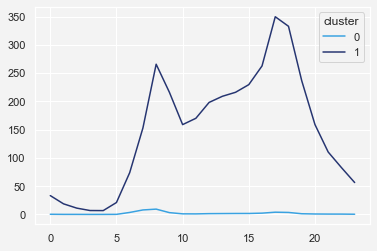

In [104]:
# result from kmeans
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

eda_plot = station_plt.reset_index().groupby('cluster')\
    .mean().drop(['start station latitude', 'start station longitude'], axis = 1).T

sns.set(rc={'axes.facecolor':'#f3f3f3', 'figure.facecolor':'#f3f3f3'})
colors = ["#39a2e1", "#263571", "#ea2029"]
sns.set_palette(sns.color_palette(colors))

eda_plot.plot()


#### Results from Hierarical Clustering

* Four groups, clustering stations by frequency of rider count
* Group 0: group reflects very low ridership in the upper Manhatten area
* Group 1: group reflects the peak time transportations, in the rest of the system

In [105]:
eda_plot.head()

cluster,0,1
0,0.331081,33.360682
1,0.148649,18.774980
2,0.135135,11.203087
3,0.074324,6.969943
4,0.101351,6.831844


In [106]:
station_plt.head()

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,start station latitude,start station longitude,cluster
start station name,,,,,,,,,,,,,,,,,,,,,
1 Ave & E 110 St,14.0,7.0,6.0,6.0,8.0,43.0,60.0,114.0,135.0,85.0,...,139.0,130.0,89.0,59.0,47.0,30.0,24.0,40.792327,-73.938300,1
1 Ave & E 15 St,103.0,55.0,54.0,24.0,32.0,38.0,146.0,390.0,618.0,331.0,...,444.0,438.0,386.0,297.0,245.0,221.0,170.0,40.732219,-73.981656,1
1 Ave & E 16 St,163.0,73.0,47.0,42.0,28.0,101.0,431.0,773.0,1067.0,637.0,...,859.0,816.0,772.0,519.0,414.0,335.0,292.0,40.732219,-73.981656,1
1 Ave & E 18 St,103.0,53.0,26.0,20.0,14.0,110.0,470.0,1060.0,1180.0,668.0,...,941.0,931.0,824.0,561.0,374.0,272.0,187.0,40.733859,-73.980504,1
1 Ave & E 30 St,126.0,33.0,29.0,15.0,18.0,72.0,208.0,687.0,1211.0,1042.0,...,782.0,728.0,619.0,497.0,252.0,181.0,159.0,40.741444,-73.975361,1


In [172]:
# k-means data prep

# demean to centralize row-wise using prepped df from heirarchical clustering
# kmean_input = hier_input.sub(hier_input.mean(axis=1), axis=0)
kmean_input = hier_input.apply(lambda t: (t - t.mean())/t.std())

In [173]:
# model fitting kmeans

from sklearn.cluster import KMeans
kmeans = KMeans()

kmeans.set_params(n_clusters = 3)
kmeans.fit(kmean_input)

KMeans(n_clusters=3)

In [174]:
kmeans.cluster_centers_

array([[-0.4256857 , -0.41054146, -0.39664311, ..., -0.43762052,
        -0.43275113, -0.54698887],
       [ 2.76781487,  2.76979725,  2.64915606, ...,  2.83457354,
         2.82328095,  0.7490552 ],
       [ 0.70678343,  0.64096053,  0.6301442 , ...,  0.73098972,
         0.71465656,  2.04509926]])

In [175]:
kmeans.labels_

array([0, 2, 1, ..., 0, 0, 0], dtype=int32)

In [176]:
# adding back coordination
station_plt = pd.merge(kmean_input, coor, 
                       left_on = 'start station name', 
                       right_on = 'start station name',
                       how = 'left')

In [177]:
# plotting clusters
import plotly.express as px
import plotly.graph_objects as go
px.set_mapbox_access_token(open('/Users/bkuo/Local Documents/Bootcamp 2020/Project/Capstone/CitiBikeCapStone/EDA/mapbox_token.txt').read())

station_plt['cluster'] = kmeans.labels_
# resetting 
station_plt['cluster'] = station_plt['cluster'].replace([0, 1, 2], [0, 2, 1])

df = station_plt
plot_kmeans = px.scatter_mapbox(df, 
                                 lat='start station latitude', 
                                 lon='start station longitude', 
                                 color="cluster",
    #                                  color_continuous_scale=px.colors.sequential.Rainbow,
                                 size_max=15, 
                                 zoom=10,
                                 hover_name= station_plt.index,
                                 title = 'K-means Clustering')

plot_kmeans.show()

In [178]:
import scikitplot.plotters as skplt 
# import plot_elbow_curve, plot_silhouette

/Users/bkuo/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:86: FutureWarning:

Function plot_elbow_curve is deprecated; This will be removed in v0.4.0. Please use scikitplot.cluster.plot_elbow_curve instead.



<AxesSubplot:title={'center':'Elbow Plot'}, xlabel='Number of clusters', ylabel='Sum of Squared Errors'>

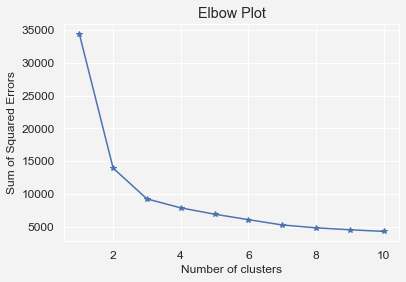

In [179]:
# plot_inertia(kmeans, x, range(1, 10))
skplt.plot_elbow_curve(kmeans, kmean_input, cluster_ranges=range(1, 11))


/Users/bkuo/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:86: FutureWarning:

Function plot_silhouette is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_silhouette instead.



<AxesSubplot:title={'center':'Silhouette Analysis'}, xlabel='Silhouette coefficient values', ylabel='Cluster label'>

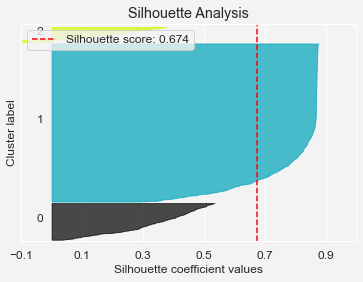

In [180]:
# plot_silhouette(kmeans, x)
skplt.plot_silhouette(kmeans, kmean_input)
# plt.show()

In [188]:
eda_plot.describe()

cluster,0,1,2
count,24.000000,24.000000,24.000000
mean,-0.421381,0.763602,2.581871
std,0.053531,0.164894,0.239331
min,-0.464142,0.371486,1.912281
25%,-0.459473,0.690328,2.484796
50%,-0.438517,0.807472,2.630637
75%,-0.407067,0.906026,2.766364
max,-0.266894,0.967875,2.834574


<AxesSubplot:xlabel='start_hour'>

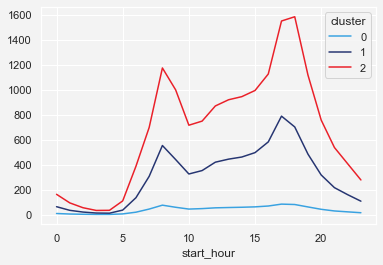

In [201]:
# result from kmeans
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

eda_plot = hier_input.copy()
eda_plot['cluster'] = kmeans.labels_
eda_plot['cluster'] = eda_plot['cluster'].replace([0, 1, 2], [0, 2, 1])
# eda_plot = eda_plot.reset_index().groupby('cluster')\
#     .mean().drop(['start station latitude', 'start station longitude'], axis = 1).T

eda_plot = eda_plot.groupby('cluster').mean().T


sns.set(rc={'axes.facecolor':'#f3f3f3', 'figure.facecolor':'#f3f3f3'})
colors = ["#39a2e1", "#263571", "#ea2029", '#6d7874']
sns.set_palette(sns.color_palette(colors))

eda_plot.plot()


#### Results from K-Mean Clustering

* Three distinct groups, clustering stations by magnitude of rider count
* Group 0 has the lowerst overall number of rider count, below average, relatively steady ride count with peak hours showing the lowest ridership, including all the stations furthest away from lower Manhattan
* Group 1 has a mediumn level of rider count (above average), but still less than group 2, scattered throughout Manhattan and Brooklyn, with 
* Group 2 has the highest number of overall number of rider counts, the stations are mostly in the lower Manhattan area and has similar rider distribution as group 1, but at a bigger scale

In [182]:
fields = ['Station Name', 'Station Latitude', 'Station Longitude', 'Line']
subway_raw = pd.read_csv('/Users/bkuo/Local Documents/Bootcamp 2020/Project/Capstone/CitiBikeCapStone/Data/NYC subway data/NYC_Transit_Subway_Entrance_And_Exit_Data.csv',
                        usecols = fields )

In [183]:
subway_raw.head()

,Line,Station Name,Station Latitude,Station Longitude
0,4 Avenue,25th St,40.660397,-73.998091
1,4 Avenue,25th St,40.660397,-73.998091
2,4 Avenue,36th St,40.655144,-74.003549
3,4 Avenue,36th St,40.655144,-74.003549
4,4 Avenue,36th St,40.655144,-74.003549


In [184]:
lines = ['Dyre Av', 'White Plains Road','Jerome', 'Concourse', 'Lenox',
'Broadway-7th Ave', '8 Avenue', 'Lexington', 'Broadway',
'Flushing', '6 Avenue', 'Clark', 'Canarsie', 'Nassau']

df = subway_raw[subway_raw['Line'].isin(lines)]
subway = px.scatter_mapbox(df, 
                         lat='Station Latitude', 
                         lon='Station Longitude', 
                         color="Line",
#                                  color_continuous_scale=px.colors.sequential.Rainbow,
                         size_max=15, 
                         zoom=10,
                         #hover_name= station_plt.index,
                         title = 'NYC Subway')

subway.show()